# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.



In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [2]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [3]:
rides.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [52]:
rides[rides['holiday']==1]

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
372        373  2011-01-17       1   0     1   0        1        1   
373        374  2011-01-17       1   0     1   1        1        1   
374        375  2011-01-17       1   0     1   2        1        1   
375        376  2011-01-17       1   0     1   3        1        1   
376        377  2011-01-17       1   0     1   4        1        1   
377        378  2011-01-17       1   0     1   5        1        1   
378        379  2011-01-17       1   0     1   6        1        1   
379        380  2011-01-17       1   0     1   7        1        1   
380        381  2011-01-17       1   0     1   8        1        1   
381        382  2011-01-17       1   0     1   9        1        1   
382        383  2011-01-17       1   0     1  10        1        1   
383        384  2011-01-17       1   0     1  11        1        1   
384        385  2011-01-17       1   0     1  12        1        1   
385        386  2011-01-17       1   0     1  13        1        1   
386        387  2011-01-17       1   0     1  14        1        1   
387        388  2011-01-17       1   0     1  15        1        1   
388        389  2011-01-17       1   0     1  16        1        1   
389        390  2011-01-17       1   0     1  17        1        1   
390        391  2011-01-17       1   0     1  18        1        1   
391        392  2011-01-17       1   0     1  19        1        1   
392        393  2011-01-17       1   0     1  20        1        1   
393        394  2011-01-17       1   0     1  21        1        1   
394        395  2011-01-17       1   0     1  22        1        1   
395        396  2011-01-17       1   0     1  23        1        1   
1157      1158  2011-02-21       1   0     2   0        1        1   
1158      1159  2011-02-21       1   0     2   1        1        1   
1159      1160  2011-02-21       1   0     2   2        1        1   
1160      1161  2011-02-21       1   0     2   3        1        1   
1161      1162  2011-02-21       1   0     2   4        1        1   
1162      1163  2011-02-21       1   0     2   5        1        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16439    16440  2012-11-22       4   1    11  17        1        4   
16440    16441  2012-11-22       4   1    11  18        1        4   
16441    16442  2012-11-22       4   1    11  19        1        4   
16442    16443  2012-11-22       4   1    11  20        1        4   
16443    16444  2012-11-22       4   1    11  21        1        4   
16444    16445  2012-11-22       4   1    11  22        1        4   
16445    16446  2012-11-22       4   1    11  23        1        4   
17212    17213  2012-12-25       1   1    12   0        1        2   
17213    17214  2012-12-25       1   1    12   1        1        2   
17214    17215  2012-12-25       1   1    12   2        1        2   
17215    17216  2012-12-25       1   1    12   4        1        2   
17216    17217  2012-12-25       1   1    12   5        1        2   
17217    17218  2012-12-25       1   1    12   6        1        2   
17218    17219  2012-12-25       1   1    12   7        1        2   
17219    17220  2012-12-25       1   1    12   8        1        2   
17220    17221  2012-12-25       1   1    12   9        1        2   
17221    17222  2012-12-25       1   1    12  10        1        2   
17222    17223  2012-12-25       1   1    12  11        1        2   
17223    17224  2012-12-25       1   1    12  12        1        2   
17224    17225  2012-12-25       1   1    12  13        1        2   
17225    17226  2012-12-25       1   1    12  14        1        2   
17226    17227  2012-12-25       1   1    12  15        1        2   
17227    17228  2012-12-25       1   1    12  16        1        2   
17228    17229  2012-12-25       1   1    12  17        1        2   
17229    17230  2012-12-25       1   1    12  18        1        2   
17230    17231  2

## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

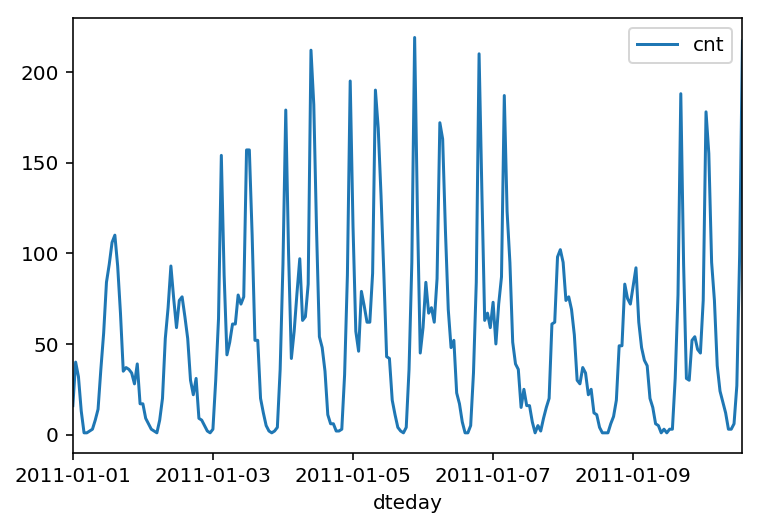

In [4]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [5]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

yr  holiday  temp   hum  windspeed  casual  registered  cnt  season_1  \
0   0        0  0.24  0.81        0.0       3          13   16         1   
1   0        0  0.22  0.80        0.0       8          32   40         1   
2   0        0  0.22  0.80        0.0       5          27   32         1   
3   0        0  0.24  0.75        0.0       3          10   13         1   
4   0        0  0.24  0.75        0.0       0           1    1         1   

   season_2    ...      hr_21  hr_22  hr_23  weekday_0  weekday_1  weekday_2  \
0         0    ...          0      0      0          0          0          0   
1         0    ...          0      0      0          0          0          0   
2         0    ...          0      0      0          0          0          0   
3         0    ...          0      0      0          0          0          0   
4         0    ...          0      0      0          0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  
0          0          0          0          1  
1          0          0          0          1  
2          0          0          0          1  
3          0          0          0          1  
4          0          0          0          1  

[5 rows x 59 columns]

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [6]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

### Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [7]:
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [8]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [57]:
train_targets.shape

(15435, 3)

In [50]:
train_features.shape[0]/24

643.125

In [51]:
train_features.shape

(15435, 56)

## Time to build the network

Below you'll build your network. We've built out the structure and the backwards pass. You'll implement the forward pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

--------------

### Eddy's notes and formulas

I'll refer to matrix dimensions by I (num of input units), H (num of hidden units, U (num of output units)

### Forward Pass

##### Forward Prop Hidden Layer

$activation_{hid}(x) = \frac{1}{(1+ e^{-x})}$

$Hid_{out} = activation_{hid}(w_{input} \times x_{input}) $

$Hid_{out}  = (1+ e^{-w_{input} \times x_{input}})^{-1}$




##### Forward Prop Final Layer

$activation_{final}(x) =  x$

$ final_{out} = activation_{final}(w_{hid} \times Hid_{out}) $

$final_{out} = w_{hid} \times Hid_{out}$,

The output layer usually has a linear identity $f(x) = x$ activation function because its meant to match a real value target for regression, or a class score in the case of classification. Reference [http://cs231n.github.io/neural-networks-1/]

### Back Propagation

##### Back Prop Final Layer

$\delta_{final} $ is output error of final layer times the gradient of final layer

$\delta_{final} = (target - final_{out}) \times activation_{final}'(w_{hid} \times Hid_{out})$

Since $activation_{final}(w_{hid} \times Hid_{out}) = w_{hid} \times Hid_{out}$,

The derivative with respect to $w_{hid} \times Hid_{out}$, $activation_{final}'(w_{hid} \times Hid_{out}) = 1$

Therefore 

$\delta_{final} = (target - final_{out}) \times 1$

Weight update $\Delta w_{hid} = \eta \times \delta_{final} \times Hid_{out}^T $, where $ 0 <\eta <1 $ is the learning rate.

The $Hid_{out}^T$ is coming from the chain rule, and it is the local gradient with respect to $w_{hid}$ of the product of $w_{hid} \times Hid_{out}$.  

The reason for the tranpose of $Hid_{out}$ is to get the dimensions of $\Delta w_{hid}$ to match the dimensions of the weight matrix $w_{hid}$.  $w_{hid}$ has U rows and H columns [U x H]. During forward propagation, $w_{hid}$ multiplies with the H hidden units to get U values to the final layer.  To go 'backwards', we need to multiply the $delta_{final}$ column vector of U rows with the $Hid_{out}^T$ row vector of H columns, to get a weight step matrix $\Delta w_{hid}$ of U rows, H columns.


##### Back Prop Hidden Layer

$\delta_{hid}$ is error of hidden layer times gradient of hidden layer

$\delta_{hid} = w_{hid}^{T} \times \delta_{final} \times activation_{hid}'(w_{input} \times x_{input})$

The error of the hidden layer is the weighted average of the final layer's $\delta_{final}$, and we use the weights from the hidden to final layer $w_{hid}$.  

We use the transpose $w_{hid}^T$ because we're moving backwards from the final layer towards the hidden layer.  When going forward, the [U x H] weight matrix multiplies the H hidden units, and the product has U final units.  To go backwards, we start with U final errors $\delta_{final}$ and multiply by the transposed weight matrix $w_{hid}^T$ [H x U] to get H hidden layer errors. 

The gradient of the hidden layer is the derivative of the activation coming out of the hidden layer



Note that $activation_{hid} $ is the sigmoid. 

Since $Hid_{out} = activation_{hid}(w_{input} \times x_{input})$, 

its derivative $activation_{hid}'(w_{input} \times x_{input}) = Hid_{out} \times (1 - Hid_{out}) $ 

Weight update $\Delta w_{in} = \eta \times \delta_{hid} \times x_{input}^T$, where $\eta$ is the learning rate.  

We multiply by $x_{input}$ due to the chain rule.  Since the values received by the hidden units are the product $x_{input} \times w_{input}$, the derivative of this product with respect to $w_{input}$ is $x_{input}$.

The $x_{input}^T$ is a transpose so that the product is a H x I matrix (H rows, I columns).  Since $\delta_{hid}$ is an H x 1 column, we multiply by $x_{input}^T$, which is a 1 x I row, to get an H x I weight step matrix.


---------

In [45]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes #I input nodes
        self.hidden_nodes = hidden_nodes #H hidden nodes
        self.output_nodes = output_nodes #U output nodes

        # Initialize weights
        #H x I
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        #U x H
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = self.sigmoid
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        #I x 1
        inputs = np.array(inputs_list, ndmin=2).T
        #U x 1
        targets = np.array(targets_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        # [H x 1]                           [H x I]  [I x 1]        
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)# signals into hidden layer
        
        # U x 1                         U x 1
        hidden_outputs = self.sigmoid(hidden_inputs)# signals from hidden layer
        
        # TODO: Output layer
        # U x 1                         U x H                     H x 1
        final_inputs = np.dot(self.weights_hidden_to_output , hidden_outputs)# signals into final output layer
        
        # U x 1
        final_outputs = final_inputs # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error
        # U x 1
        output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
        output_grad = output_errors * 1 #gradient of f(x) = x is 1
        
        # TODO: Backpropagated error
        # H x 1                      H x U                         U x 1
        hidden_errors = np.dot(self.weights_hidden_to_output.T, output_grad) # errors propagated to the hidden layer

        # H x 1           H x 1           1x1                 1x1
        hidden_grad = hidden_errors * hidden_outputs * (1 - hidden_outputs) # hidden layer gradients
        
        # TODO: Update the weights
        # U x H                              1x1               U x 1            1 x H
        self.weights_hidden_to_output += self.lr * np.dot(output_grad, hidden_outputs.T) # update hidden-to-output weights with gradient descent step
        # H x I                              1x1             H x 1      1 x I 
        self.weights_input_to_hidden += self.lr * np.dot(hidden_grad, inputs.T) # update input-to-hidden weights with gradient descent step
 
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)# signals into hidden layer
        hidden_outputs = self.sigmoid(hidden_inputs)# signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output , hidden_outputs)# signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs

In [10]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Training the network

Here you'll set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently. You'll learn more about SGD later.

### Choose the number of epochs
This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. You'll need to choose enough epochs to train the network well but not too many or you'll be overfitting.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
The more hidden nodes you have, the more accurate predictions the model will make. Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.

In [53]:
import sys

### Set the hyperparameters here ###
epochs = 1000
learning_rate = 0.05
hidden_nodes = 10
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.088 ... Validation loss: 0.163

(0.017276962735575933, 0.5)

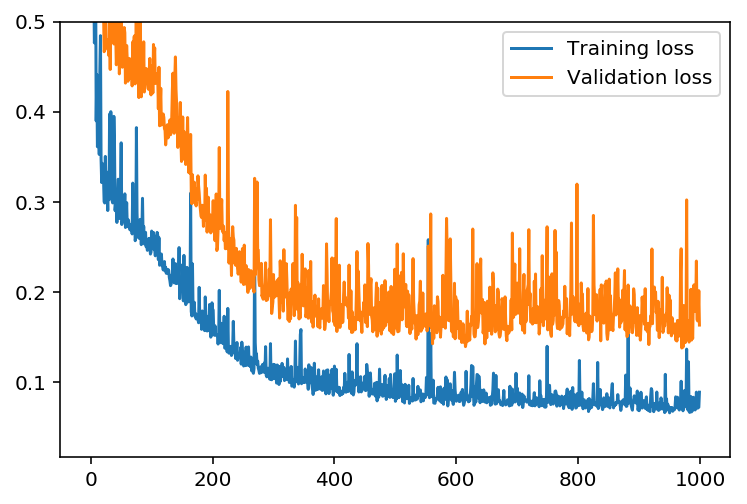

In [54]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=0.5)

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

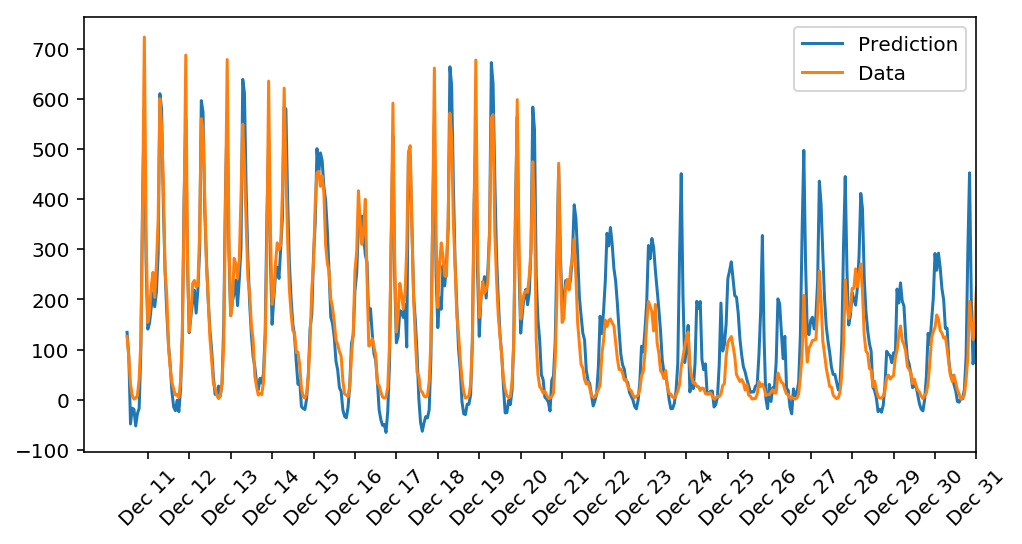

In [55]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## Thinking about your results
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Your answer below

The average squared difference between predicted and actual bike counts (mean-squared error) on the validation data is 0.163.  The model does not appear able to predict lower bike rentals on days that are close to but not labeled a holiday (for example, December 22, 23 and 24 have lower bike rentals than the model predicts


## Unit tests

Run these unit tests to check the correctness of your network implementation. These tests must all be successful to pass the project.

In [24]:
import unittest

inputs = [0.5, -0.2, 0.1]
targets = [0.4]
test_w_i_h = np.array([[0.1, 0.4, -0.3], 
                       [-0.2, 0.5, 0.2]])
test_w_h_o = np.array([[0.3, -0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        
        #print(network.weights_hidden_to_output)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328, -0.03172939]])))
        
        print(network.weights_input_to_hidden)
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014,  0.39775194, -0.29887597],
                                              [-0.20185996,  0.50074398,  0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....

[[ 0.10562014  0.39775194 -0.29887597]
 [-0.20185996  0.50074398  0.19962801]]



----------------------------------------------------------------------
Ran 5 tests in 0.020s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>